In [2]:
# Set up autoreload for testing
%load_ext autoreload
%autoreload 2

In [3]:
# Add the parent directory to the system path in order to get the utils directory
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [4]:
# Import the game configuration state & login secrets
import yaml
with open(r'../configs/secrets.yaml') as file:
    SECRETS = yaml.load(file, Loader=yaml.FullLoader)

with open(r'../configs/game_1.yaml') as file:
    GAME_CONFIG = yaml.load(file, Loader=yaml.FullLoader)

In [5]:
# Create a new Littlefield Driver
from utils.LittlefieldDriver import LittlefieldDriver
lfd = LittlefieldDriver(
    config = GAME_CONFIG,
    secrets = SECRETS
)

In [6]:
# Fetch the historical data of each node in the game.
lfdata = lfd.data(refresh = True)
lfdata.tail()

,CASH,JOBIN,JOBQ,INV,S1Q,S1UTIL,S2Q,S2UTIL,S3Q,S3UTIL,JOBOUT,JOBT,JOBREV
day,,,,,,,,,,,,,
46,1173.2,18.0,0.0,1140.0,0.0,0.438,0.0,0.255,0.0,0.625,17.0,0.074,400.0
47,1180.8,18.0,0.0,1140.0,0.0,0.459,0.0,0.270,0.0,0.625,19.0,0.074,400.0
48,1188.0,18.0,0.0,1260.0,0.0,0.455,0.0,0.262,0.0,0.648,18.0,0.074,400.0
49,1195.6,19.0,0.0,1320.0,0.0,0.475,0.0,0.277,0.0,0.654,19.0,0.074,400.0
50,1203.2,20.0,0.0,120.0,0.0,0.479,0.0,0.277,0.0,0.673,19.0,0.074,400.0


In [20]:
lfdata["CASH"] = lfdata["CASH"] * 1000

In [31]:
lfdata["JOBSDONE"] = lfdata["JOBOUT"].cumsum()
lfdata["JOBSTAKEN"] = lfdata["JOBIN"].cumsum()
lfdata["NETFLOW"] = lfdata["JOBIN"] - lfdata["JOBOUT"]
lfdata["CURRENTLOAD"] = lfdata["NETJOBS"].cumsum()
lfdata.tail()

,CASH,JOBIN,JOBQ,INV,S1Q,S1UTIL,S2Q,S2UTIL,S3Q,S3UTIL,JOBOUT,JOBT,JOBREV,JOBSDONE,JOBSLEFT,JOBSTAKEN,JOBSPENDING,CASHFLOW,PROFITPERJOB,NETJOBS
day,,,,,,,,,,,,,,,,,,,,
46,1173200.0,18.0,0.0,1140.0,0.0,0.438,0.0,0.255,0.0,0.625,17.0,0.074,400.0,433.0,2.0,435.0,2.0,6800.0,400.0,1.0
47,1180800.0,18.0,0.0,1140.0,0.0,0.459,0.0,0.270,0.0,0.625,19.0,0.074,400.0,452.0,1.0,453.0,1.0,7600.0,400.0,-1.0
48,1188000.0,18.0,0.0,1260.0,0.0,0.455,0.0,0.262,0.0,0.648,18.0,0.074,400.0,470.0,1.0,471.0,1.0,7200.0,400.0,0.0
49,1195600.0,19.0,0.0,1320.0,0.0,0.475,0.0,0.277,0.0,0.654,19.0,0.074,400.0,489.0,1.0,490.0,1.0,7600.0,400.0,0.0
50,1203200.0,20.0,0.0,120.0,0.0,0.479,0.0,0.277,0.0,0.673,19.0,0.074,400.0,508.0,2.0,510.0,2.0,7600.0,400.0,1.0


<AxesSubplot:xlabel='day'>

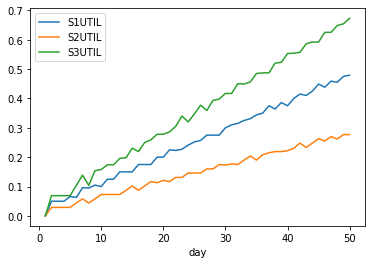

In [32]:
lfdata[[col for col in lfdata.columns if "UTIL" in col]].plot()

<AxesSubplot:xlabel='day'>

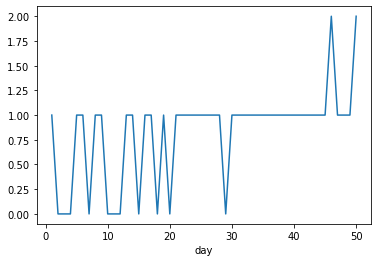

In [33]:
lfdata["JOBSPENDING"].plot()

In [35]:
lfdata["CASHFLOW"] = lfdata["CASH"].diff()
lfdata["PROFITPERJOB"] = lfdata["CASHFLOW"] / lfdata["JOBOUT"]

# This is weird - does inventory not cost anything??
lfdata.tail()

,CASH,JOBIN,JOBQ,INV,S1Q,S1UTIL,S2Q,S2UTIL,S3Q,S3UTIL,JOBOUT,JOBT,JOBREV,JOBSDONE,JOBSLEFT,JOBSTAKEN,JOBSPENDING,CASHFLOW,PROFITPERJOB,NETJOBS
day,,,,,,,,,,,,,,,,,,,,
46,1173200.0,18.0,0.0,1140.0,0.0,0.438,0.0,0.255,0.0,0.625,17.0,0.074,400.0,433.0,2.0,435.0,2.0,6800.0,400.0,1.0
47,1180800.0,18.0,0.0,1140.0,0.0,0.459,0.0,0.270,0.0,0.625,19.0,0.074,400.0,452.0,1.0,453.0,1.0,7600.0,400.0,-1.0
48,1188000.0,18.0,0.0,1260.0,0.0,0.455,0.0,0.262,0.0,0.648,18.0,0.074,400.0,470.0,1.0,471.0,1.0,7200.0,400.0,0.0
49,1195600.0,19.0,0.0,1320.0,0.0,0.475,0.0,0.277,0.0,0.654,19.0,0.074,400.0,489.0,1.0,490.0,1.0,7600.0,400.0,0.0
50,1203200.0,20.0,0.0,120.0,0.0,0.479,0.0,0.277,0.0,0.673,19.0,0.074,400.0,508.0,2.0,510.0,2.0,7600.0,400.0,1.0
